In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import sys

In [5]:
print('\n'.join(sys.path))

/home/mark/Documents/teaching/aap/whatif/notebooks
/home/mark/anaconda3/envs/datasci/lib/python38.zip
/home/mark/anaconda3/envs/datasci/lib/python3.8
/home/mark/anaconda3/envs/datasci/lib/python3.8/lib-dynload

/home/mark/.local/lib/python3.8/site-packages
/home/mark/anaconda3/envs/datasci/lib/python3.8/site-packages
/home/mark/anaconda3/envs/datasci/lib/python3.8/site-packages/IPython/extensions
/home/mark/.ipython


https://packaging.python.org/overview/


https://www.bernat.tech/pep-517-and-python-packaging/

* very readable intro to this complex topic
* very good high level diagrams of the packaging process

https://docs.python-guide.org/writing/structure/ - Hitchhikers Guide

https://blog.ionelmc.ro/2014/05/25/python-packaging/#the-structure

https://packaging.python.org/tutorials/packaging-projects/

https://packaging.python.org/guides/distributing-packages-using-setuptools/#working-in-development-mode


https://realpython.com/python-application-layouts/

https://github.com/yngvem/python-project-structure/

https://www.martinalarcon.org/2018-12-31-a-reproducible-science/ - includes stuff on cookiecutter-datascience, Luigi for workflow, Docker. It's a great example of an approach to reproducible Python work.

src/ or not to src/

https://github.com/pypa/packaging.python.org/issues/320
https://github.com/pypa/packaging.python.org/issues/320#issuecomment-495990983

## Excel "What if?" analysis with Python - Part 4: Project management and packaging


In the first three parts of this series, we've developed some Python approaches to typical Excel "what if?" analyses. This whole series is aimed at those who might have a strong Excel based background, a basic familiarity with Python programming and a desire to increase their Python knowledge.

* [Part 1: Models and Data Tables](http://hselab.org/excel-to-python-1-models-datatables.html)
* [Part 2: Goal Seek](http://hselab.org/excel-to-python-2-goalseek.html)
* [Part 3: Monte-carlo simulation](http://hselab.org/excel-to-python-3-simulation.html)

Along the way we explored some slightly more advanced Python topics (for relative newcomers to Python) such as:

* List comprehensions,
* Basic OO programming, creating our own classes and using things like `setattr` and `getattr`,
* Leveraging scikit-learn's `ParameterGrid` class,
* Faceted plots using Seaborn and matplotlib,
* Tuple unpacking, zip, and itertools,
* Safely copying objects,
* Root finding with, and without, `scipy.optimize`,
* Partial function freezing and lambda functions,
* Using `numpy.random` to generate random variates from various probability distributions,
* Using `scipy.stats` to compute probabilities and percentiles,
* Importing our `data_table`, `goal_seek` and `simulate` functions from a module.


Now that we've got a critical mass of "proof of concept" code, let's figure out how to structure our project and create a deployable package. In addition, let's rethink our OO design and add some much needed documentation to the code.

### Python packaging basics

What is a Python module? What is a Python package? A simple way to think about it is that a module is a Python file containing programs and a package is a folder containing Python program files and perhaps subfolders that also contain Python program files (yes, there are many more details). 



There are tools for turning such a folder into something that can be uploaded to places like PyPI (Python Package Index) or conda-forge (if you've used R, think CRAN) and installed by package installers like pip or conda.

**TODO** Diagram of a simple package

If you are new to the world of Python modules and packages, a great place to start is the tutorial done by the folks at Real Python - [Python Modules and Packages - An Introduction](https://realpython.com/python-modules-packages/). After going through the tutorial you'll have some familiarity with concepts needed in our tutorial:

* Python modules and how Python finds modules on your system,
* the different ways of importing modules,
* exploring the contents of modules,
* executing modules as scripts and reloading modules,
* Python packages, the __init__.py file, importing from packages, and subpackages.

Another good high level introduction to modules, packages and project structure is [The Hitchhikers Guide to Python: Structuring Your Project](https://docs.python-guide.org/writing/structure/). Of course, one should also visit the official [Python Packaging User Guide](https://packaging.python.org/) (start with the [Overview](https://packaging.python.org/overview/)), especially with the ever evolving nature of this topic. See this recent series of posts on the [State of Python Packaging](https://www.bernat.tech/pep-517-and-python-packaging/) for an "exhausting (hopefully still kinda high level) overview of the subject".

With a basic and limited understanding of Python packages, let's get to turning `whatif.py` into a package. What could possibly go wrong?


## Creating a simple Python project structure

So far, we've taken a pretty typical approach to exploring and developing our what if tools:

* use Jupyter notebooks to quickly try things out,
* single folder for the project,
* tried to use good filenames,
* when we started moving code out of notebooks and into *whatif.py*, we put the script in the same folder as the notebook (makes it easy to do an `import whatif`).

Many data analysis projects start in a similar way. In those, we usually at least would have a separate `data` folder. In terms of documentation, there are some scattered code comments and a README file with some notes to myself.

I manually created the following really simple folder structure.

    whatif
    ├── data
    ├── whatif
        ├── what_if_1_model_datatable.ipynb
        ├── what_if_2_goalseek.ipynb
        ├── what_if_3_simulation.ipynb
        └── whatif.py
    ├── README.md

Notice that for now, I've included the notebooks right in the main source code folder as opposed to in a notebooks folder. I'm doing that to put off some complexities around:

* importing code while you are still developing it,
* creating Python packages (for those who know about packaging, I've left out the `__init__.py` file for the same reasons).

However, as the project has grown and we now want to turn `whatif.py` into a reusable Python package, we need to rethink the organization of the project. In particular,

* the current structure is not what's needed for creating Python packages,
* we should have real documentation,
* the source code should be separate from example notebooks,
* we want a structure that facilitates efficient workflows and reproducible analysis and development.

We want a project structure that doesn't result in the all too common scenario of us going back to this project in six months and wondering what to make of the haphazard pile of files and folders we've created.

Analytics or data science type projects are often a blend of analysis and software development. This parallels the situation that many scientists find themselves. Organizations such as [Software Carpentry](https://software-carpentry.org/) have arisen to address the growing need for scientists/analysts to be better software developers. They have developed very high quality introductory tutorials on numerous [scientific programming related topics](https://software-carpentry.org/lessons/) such as the basics of R/Python programming, version control, bash shell use, and reproducible scientific analysis.

### So, how do you structure a Python project?

There are no shortage of opinions on this question and there's no one right answer. As the Python packaging ecosystem has evolved over time, so has the way one can and/or should structure Python projects. In addition, different types of projects (e.g. single installable library package vs a web app) might call for [different types of project layouts](https://realpython.com/python-application-layouts/).

### Enter, the Cookiecutter

Arising from this need to have a simple way to quickly create good project structures for different types of projects was the [Cookiecutter](https://cookiecutter.readthedocs.io/en/1.7.2/). From the docs:

> A command-line utility that creates projects from cookiecutters (project templates), e.g. creating a Python package project from a Python package project template.

In a nutshell, from a simple json configuration file and an example folder and file structure, the cookiecutter program asks us a few questions and then generates a skeleton project structure (set of folders and files). It does this by using [Jinja2 templates](https://jinja.palletsprojects.com/en/2.11.x/). Here's what a simple *cookiecutter.json* file might look like:

    {
        "project_name": "project name",
        "repo_name": "{{ cookiecutter.project_name }}",
        "author_name": "Your name (or your organization/company/team)",
        "description": "A short description of the project.",
        "open_source_license": ["MIT", "BSD-3-Clause", "No license file"],
    }

The key values are the cookiecutter attributes that you want to define and the values are the default values and/or options. The `{{ SOMETHING }}` are the templates. Notice that the default value for `repo_name` is just the project name you entered. These templates are then used throughout the specific cookiecutter's example folder structure and cookiecutter program is just doing a big Search and Replace and filling in templates with their values. That's it. Simple but very powerful.

Different types of Python people created different cookiecutters (i.e. templates) designed for their type of projects and their workflow and tool preferences. The most relevant for our purposes is the [Cookiecutter Data Science project](https://drivendata.github.io/cookiecutter-data-science/). 

* It was developed by the folks at [DrivenData.org](https://www.drivendata.org/),
* has a project structure that is focused on data science type work,
* the [main project documentation page](https://drivendata.github.io/cookiecutter-data-science/) has a really good introduction to the importance of good project structure and software engineering practices aimed at data science folks who might not be used to thinking of such things.

As was intended in the cookiecutter world, other people cloned the [Cookiecutter Data Science template from GitHub](https://github.com/drivendata/cookiecutter-data-science) and modified it to better suit their needs. One notable such template was developed by the Molecular Sciences Software Institute for their [Python Packages Best Practices](https://education.molssi.org/python-package-best-practices/) set of tutorials which are modeled after the Software Carpentry tutorials. We will use some materials from this MolSSI Tutorial. In their [very first lesson](https://education.molssi.org/python-package-best-practices/01-package-setup/index.html) they walk you through creating a new project structure from their [CMS Cookiecutter](https://github.com/MolSSI/cookiecutter-cms). While their cookiecutter has some very nice features, I've created our own modified data science cookiecutter called `cookiecutter-datascience-aap`. Instead of repeating things here, let's head over to the [cookiecutter-datascience-aap GitHub page](https://github.com/misken/cookiecutter-datascience-aap) and take a look at the README and other content.

## Creating a new project using the cookiecutter

Ok, let's create new project called `whatif`. 

#### Requirements to use this cookiecutter template:

I've already installed cookiecutter in our aap VM. So, the instructions below are only needed if you want
to either pip or conda install cookiecutter yourself on some machine or in some virtual environment.

 - Python 2.7 or 3.5+
 - [Cookiecutter Python package](http://cookiecutter.readthedocs.org/en/latest/installation.html) >= 1.4.0: This can be installed with pip by or conda depending on how you manage your Python packages:

``` bash
$ pip install cookiecutter
```

or

``` bash
$ conda config --add channels conda-forge
$ conda install cookiecutter
```

#### To start a new project, run from the directory in which you want your new project to live:

    cookiecutter https://github.com/misken/cookiecutter-datascience-aap
    
You'll get prompted with a series of questions and then your project will get created. 
**TODO: Create short screencast of project creation**

### Overview of cookiecutter-datascience-aap project structure

We won't get into all the details now, but there's a few things about the folder structure that we should discuss. Here's the structure:

```
├── whatif
    ├── LICENSE
    ├── README.md          <- The top-level README for developers using this project.
    ├── data
    │   ├── external       <- Data from third party sources.
    │   ├── interim        <- Intermediate data that has been transformed.
    │   ├── processed      <- The final, canonical data sets for modeling.
    │   └── raw            <- The original, immutable data dump.
    │
    ├── docs               <- A default Sphinx project; see sphinx-doc.org for details
    │
    ├── models             <- Trained and serialized models, model predictions, or model summaries
    │
    ├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
    │                         the creator's initials, and a short `-` delimited description, e.g.
    │                         `1.0-jqp-initial-data-exploration`.
    │
    ├── references         <- Data dictionaries, manuals, and all other explanatory materials.
    │
    ├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
    │   └── figures        <- Generated graphics and figures to be used in reporting
    │
    ├── requirements.txt   <- The requirements file for reproducing the analysis environment, e.g.
    │                         generated with `pip freeze > requirements.txt`
    │
    ├── setup.py           <- makes project pip installable (pip install -e .) so whatif can be imported
    ├── src                <- Source code for use in this project.
    │   ├── whatif <- Main package folder
    │   │   └── __init__.py    <- Marks as package
    │   │   └── whatif.py  <- Python source code file
    │
    └── tox.ini            <- tox file with settings for running tox; see tox.readthedocs.io
```

A few things to note for now:

1. The top level `whatif` folder will be called the *project folder*.
1. A whole bunch of folders and files are created.
1. You can delete folders and add folders depending on the project. 
1. This project uses what is known as a "src folder layout". With the `src` folder is the main package folder, `whatif`.
1. Within the `whatif` package folder, is an __init__.py file. We'll talk more about this later in the notebook, but for now, think of it as a marker signifying that `whatif` is a Python package.
1. Also within the `whatif` folder, is an empty Python source code file named `whatif.py`. We can replace this with our current `whatif.py` file, or add code to this file, or delete this file. There is no requirement that we have a `.py` file with the same name as the `package`. We often do, but that's just a convention.

The whole "should you use a `src` folder within which the main package folder lives?" is quite a point of discussion in the Python community. Recently, it seems like using this `src` based layout is gaining favor. If you want to dive down this rabbit hole, here's a few links to get you going:

* https://blog.ionelmc.ro/2014/05/25/python-packaging/#the-structure
* https://github.com/pypa/packaging.python.org/issues/320

### Adding files to our new project

Since we've got some work in process in the form of a few Jupyter notebooks and an early version of `whatif.py`, we can add them to our project. We also have this notebook in which I'm typing right now (feeling very self-referential). I'm going to put the notebooks relating to the first three parts of this series into the `examples` folder along with a few other examples.

```
├── examples
│   │   ├── BookstoreModel.py
│   │   ├── new_car_simulation.ipynb
│   │   ├── what_if_1_model_datatable.ipynb
│   │   ├── what_if_2_goalseek.ipynb
│   │   └── what_if_3_simulation.ipynb

```

Within the `notebooks` folder, I'm putting this notebook along with some notes in a markdown file.

```
├── notebooks
│   │   ├── testing_cookiecutter_structures.md
│   │   └── what_if_4_project_packaging.ipynb

```

Finally, I replaced the placeholder `whatif.py` file with the working version upon which this project will be built.

## Version control

The very first thing we should do after getting our project initialized is to put it under version control. We'll use git and GitHub. There are many good tutorials out there for learning the basics of using git and GitHub for version control. I have an introductory [lesson](http://www.sba.oakland.edu/faculty/isken/courses/mis5470_w21/git_intro.html) that I created for use in an introductory R/Python based analytics [course](http://www.sba.oakland.edu/faculty/isken/courses/mis5470_w21/index.html) I also teach.

Get a shell open in the main project folder (NOT the package folder). Then we can initialize the project folder as a git repo:

```
git init
git add .
git commit -m 'initial commit'
```

Then I went to my GitHub site and created a brand new repo named `whatif`. Since we already have an existing local repo that we will be pushing up to a new remote at GitHub, we do the following:

```
git remote add origin https://github.com/<your github user name>/whatif.git
git branch -M main
git push -u origin main
```

Now you've got a new GitHub repo at `https://github.com/<your github user name>/whatif`.

## Source code editing
For now, we are going to edit *whatif.py* with a good text editor. In Linux, I use Geany as it has some nice features for programming including syntax highlighting, setting indent to spaces, code folding, a visual code structure tree, and many more. Do a search for "linux best code editors" and you can find additional options for editors. 

> If you want to spend some time on a long time point of contention, check out the [vim vs emacs](https://linuxhint.com/vim_vs_emacs/) debate. But to really even appreciate that debate, you should have [some familiarity with *vi*](https://www.ele.uri.edu/faculty/vetter/Other-stuff/vi/vi-intro.pdf), the precursor to *vim*. It's a whole different world than using a modern text editor. I used *vi* in grad school (decades ago), but any knowledge I had is long gone. 

Seriously, don't do this; just grab Geany or Atom (any platform) or Sublime Text or Notepad++ (Windows) or some other decent text editor.

Later, we'll use the PyCharm (or Spyder) IDE, but for now, a good text editor is more than sufficient.

## The whatif.py module - initial design
After completing Part 3 of this series, we had an example model class, `BookstoreModel`, and three functions that took such a model as one of the arguments and one utility function that was used to extract a Pandas `DataFrame` from the simulationoutput object (a list of dictionaries).

* `data_table` - a generalized version of Excel's Data Table tool,
* `goal_seek` - very similar in purpose to Excel's Goal Seek tool,
* `simulate` - basic Monte-Carlo simulation capabilities,
* `get_sim_results_df` - converts output of `simulate` to a pandas dataframe.

All of these were copied and pasted from their respective Jupyter notebooks and consolidated in the *whatif.py* file. This module can be imported and its functions used. While this is workable, let's try to generalize things a bit and improve the design. 

## Creating a `Model` base class

Everything we've done so far has used the one specific model class we created - `BookstoreModel`. In order to create a new model, we'd probably copy the code from this class and make the changes specific to the new model in terms of its variables (class attributes) and formulas (class methods). However, every model class (as we've conceived it so far) also needs to have an `update` method that takes a dictionary of model variable names (the keys) and their new values. Rather than the modeler having to remember to do this, it makes more sense to create a generic `Model` *base class* from which our specific model classes will *inherit* things like an `update` method. I also moved the `__str__` function into our new `Model` base class.

All three of the analysis functions we created (`data_table`, `goal_seek` and `simulate`) rely on this specific implementation of `update` and require a model object as an input argument. Given that, it makes sense to move these functions from their current place as *module level* functions to class methods of the new base class, `Model`. You can find this new `Model` base class within `whatif.py` at the [whatif project GitHub site](https://github.com/misken/whatif).

If you are new to OOP, check out this [tutorial which discusses inheritance](https://www.python-course.eu/python3_inheritance.php).

## Adding new methods to `BookstoreModel` 
Anyone who builds spreadsheet models knows that it's usually better to decompose large formulas into smaller peices. Not only does this help with model debugging and readability, it provides an easy way to analyze components of composite quantities. For example, `sales_revenue` is based on the number of units sold and the selling price per unit. Our original implemenation buried the computation of number sold into the `sales_revenue` function. This makes it tough to do things like sensitivity analysis on number sold. So, we'll rework the class a bit to add some new methods. Notice, I've also added basic docstrings - more on documentation later in this notebook.

Here's our updated `BookstoreModel` class. A few additional things to note beyond the new methods added:

* it includes the `Model` *base class* within the parentheses,
* it no longer has an `update` method,
* it no longer has a `__str__` method.

`BookstoreModel` will inherit `update` from the `Model` class. It also inherits `__str__`, but we could certainly include an `__str__` method in `BookstoreModel` if we wanted some custom string representation or just didn't like the one in the `Model` base class. This is called *method overriding*.

In [6]:
class BookstoreModel(Model):
    """Bookstore model

    This example is based on the "Walton Bookstore" problem in *Business Analytics: Data Analysis and Decision Making* (Albright and Winston) in the chapter on Monte-Carlo simulation. Here's the basic problem (with a few modifications):

    * we have to place an order for a perishable product (e.g. a calendar),
    * there's a known unit cost for each one ordered,
    * we have a known selling price,
    * demand is uncertain but we can model it with some simple probability distribution,
    * for each unsold item, we can get a partial refund of our unit cost,
    * we need to select the order quantity for our one order for the year; orders can only be in multiples of 25.

    Attributes
    ----------
    unit_cost: float or array-like of float, optional
        Cost for each item ordered (default 7.50)
    selling_price : float or array-like of float, optional
        Selling price for each item (default 10.00)
    unit_refund : float or array-like of float, optional
        For each unsold item we receive a refund in this amount (default 2.50)
    order_quantity : float or array-like of float, optional
        Number of items ordered in the one time we get to order (default 200)
    demand : float or array-like of float, optional
        Number of items demanded by customers (default 193)
    """
    def __init__(self, unit_cost=7.50, selling_price=10.00, unit_refund=2.50,
                 order_quantity=200, demand=193):
        self.unit_cost = unit_cost
        self.selling_price = selling_price
        self.unit_refund = unit_refund
        self.order_quantity = order_quantity
        self.demand = demand

    def order_cost(self):
        """Compute total order cost"""
        return self.unit_cost * self.order_quantity

    def num_sold(self):
        """Compute number of items sold

        Assumes demand in excess of order quantity is lost.
        """
        return np.minimum(self.order_quantity, self.demand)

    def sales_revenue(self):
        """Compute total sales revenue based on number sold and selling price"""
        return self.num_sold() * self.selling_price

    def num_unsold(self):
        """Compute number of items ordered but not sold

        Demand was less than order quantity
        """
        return np.maximum(0, self.order_quantity - self.demand)

    def refund_revenue(self):
        """Compute total sales revenue based on number unsold and unit refund"""
        return self.num_unsold()  * self.unit_refund

    def total_revenue(self):
        """Compute total revenue from sales and refunds"""
        return self.sales_revenue() + self.refund_revenue()

    def profit(self):
        """Compute profit based on revenue and cost"""
        profit = self.sales_revenue() + self.refund_revenue() - self.order_cost()
        return profit


NameError: name 'Model' is not defined

## Using the Bookstore Model
Great, we've made some improvements both to `BookstoreModel` class as well as to the underlyng `Model` base class (which didn't exist before). However, if we try to create a new instance of `BookstoreModel` we quickly run into trouble. In fact, if we try to execute the cell above which defines the `BookstoreModel` class, we get an error saying that the `Model` class does not exist. Where is it? It's in the `whatif.py` module (which is **not** in the same folder as this notebook). Can't we just import it like we did before?

In [7]:
from whatif import Model

ModuleNotFoundError: No module named 'whatif'

Where does Python go to look for modules like `whatif`? It examines something known as `sys.path`.

In [8]:
import sys
print('\n'.join(sys.path))

/home/mark/Documents/teaching/aap/whatif/notebooks
/home/mark/anaconda3/envs/datasci/lib/python38.zip
/home/mark/anaconda3/envs/datasci/lib/python3.8
/home/mark/anaconda3/envs/datasci/lib/python3.8/lib-dynload

/home/mark/.local/lib/python3.8/site-packages
/home/mark/anaconda3/envs/datasci/lib/python3.8/site-packages
/home/mark/anaconda3/envs/datasci/lib/python3.8/site-packages/IPython/extensions
/home/mark/.ipython


A couple things to take away from the `sys.path` list:

* Python first looks in the current working directory,
* from the remaining paths, we see that we are working in a conda virtual environment named `datasci`.

Since the import of `whatif` failed, we can conclude that not only is `whatif.py` not in the current working directory, it also has not been installed in the conda `datasci` virtual environment (that I created).

Of course, the whole point of this exercise is to turn `whatif` into an installable package so that we can use it from notebooks like this. Let's learn how to do that.

## Creating the whatif package
There are two critical files which we have yet to discuss - `__init__.py` and `setup.py`. Both of these were created by our cookiecutter and plopped into our project.

### The __init__.py file
Well, this got more confusing after Python 3.3 was release in that now there are [regular packages and namespace packages](https://docs.python.org/3/reference/import.html#regular-packages). For our purposes, we will just be considering *regular packages* and discuss a standard purpose and use of `__init__.py`. This file, which is often blank, when placed into a folder, marks this folder as a regular package. When this folder is imported, any code in `__init__.py` is executed. Here is the `__init__.py` file for the `whatif` package.

```
from whatif.whatif import Model
from whatif.whatif import get_sim_results_df
```

Just focus on the first line. That first `whatif` is the package (the folder) and that second `whatif` is referring to the module (the file) `whatif.py`. We know that the class definition for `Model` is in that file. After we install the `whatif` package (which we'll get to shortly), we could always import it for use in a Jupyter notebook with the statements like those above. However, by including them in the `__init__.py` file, we have imported them at the *package level* and can use the shorter:

```
from whatif import Model
from whatif import get_sim_results_df
```

In essence, as the developer, we are including the lines in `__init__.py` to make it easier on our users by exposing commonly used objects at the package level. 

Things can get way more confusing when we start to develop subpackages and have complex dependencies between packages, but for now, this is enough. For a good discussion of `__init__.py`, check out [this StackOverflow post](https://stackoverflow.com/questions/448271/what-is-init-py-for).

### Installing our package and learning about that setup.py file
Finally, we are ready to create our `whatif` package and then "deploy" it by installing it into a new conda virtual environment. Wider deployment such as publishing our package to PyPI will wait. Since our project is in a public GitHub repo, others can clone our project and install it themselves in the same way we are about to install it. If we really aren't ready to share our project with the world in any way, we could simply make the GitHub repo private. Even free GitHub accounts get some limited number of private repos.

Like everything, it seems, in the world of Python packaging, there are all kinds of potential complications and frustrations. We'll be trying to keep things as simple as possible.

The primary role of the `setup.py` file is to act as a configuration file for your project. At a minimum, this file will contain a call to the `setup` function which is part of the [setuptools](https://setuptools.readthedocs.io/en/latest/setuptools.html) package, the primary way Python code is packaged for distribution. The `setup` function has numerous arguments but we will only use a small number of them. 

```
# setup.py

from setuptools import find_packages, setup

setup(
    name='whatif',
    packages=find_packages("src"),
    package_dir={"": "src"},
    install_requires=['numpy', 'pandas'],
    version='0.1.0',
    description='What if analysis in Python',
    author='misken',
    license='MIT',
)

```

Most of the options are actually pretty self-explanatory. However, given our folder structure, two of these lines are particularly important.

```
packages=find_packages("src"),
package_dir={"": "src"},
```

The `find_packages` function is part of `setuptools` and we are telling `setup` that it can find our package folders inside of the `src` folder. See the following two links if you are interested in more technical details on these options and broader issues in the Python packaging world.

* https://hynek.me/articles/testing-packaging/
* https://docs.python.org/3/distutils/setupscript.
* https://www.python.org/dev/peps/pep-0517/

Now we are ready to install our package. For that we will use a tool called pip - which stands for "pip installs packages". Backing up for a second, since we are using the Anaconda Python distribution, we usually use conda for installing packages. However, to install packages that are not in conda's repositories, we can actually use pip to install packages into conda virtual environments. 

Since we have not published our package to PyPI, we going to install it from our local project folder. Open a shell and navigate to your project folder (it contains `setup.py`). Make sure you activate the desired virtual environment before installing your package. For example, we saw earlier in this notebook that my active conda virtual environment is called `datasci`. For development projects, I usually create a new conda environment to act as a sort of sandbox for trying out new packages. Typically I just clone my `datasci` environment. For example, to create a clone named `whatif`, I just do:

```
conda create -n whatif --clone datasci
conda activate whatif
```

With the new environment activated, I can install the `whatif` package with:

```
pip install .
```

The "dot" means, install from the current directory.

So, I'm going to close this notebook, activate my new `whatif` environment, pip install the `whatif` package and then restart Jupyter Lab within the `whatif` environment.

https://stackoverflow.com/questions/35064426/when-would-the-e-editable-option-be-useful-with-pip-install

https://pip-python3.readthedocs.io/en/latest/reference/pip_install.html#vcs-support

https://realpython.com/absolute-vs-relative-python-imports/

https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload

Lot's more to do, but let's stop here for this post. The basic design seems ok and we can build on this in future installments.

## Wrap up and next steps
We have added a basic `simulate` function to our `data_table` and `goal_seek` functions. Python is proving to be quite nice for doing Excel-style "what if?" analysis. 

In Part 4 of this series, we'll make some improvements and do some clean-up on our classes and functions. We'll move everything into a single **whatif.py** module and learn how to create a Python package to make it easy to use and share our new functions. We'll try out our package on a new model and sketch out some ideas for future enhancements to the package. It's important we also start creating some basic documentation and a user guide.

### Create a model object

In [5]:
import whatif

In [6]:
base_inputs = {'unit_cost': 7.50,
              'selling_price': 10.00,
              'unit_refund': 2.50,
              'order_quantity': 200,
              'demand': 193}

Since our example model class has all keyword args, we can use [dictionary unpacking](https://realpython.com/iterate-through-dictionary-python/#using-the-dictionary-unpacking-operator) to pass the arguments in.

In [7]:
book_model = whatif.BookstoreModel(**base_inputs)

# Instead of above, can also do using the update method of the class
# book_model = whatif.BookstoreModel()
# book_model.update(base_inputs)

print(book_model)

{'unit_cost': 7.5, 'selling_price': 10.0, 'unit_refund': 2.5, 'order_quantity': 200, 'demand': 193}


### Do some goal seeking

Find the breakeven level of demand using `goal_seek`.

In [8]:
whatif.goal_seek?

Signature: whatif.goal_seek(model, obj_fn, target, by_changing, a, b, N=100)
Docstring:
Approximate solution of f(x)=0 on interval [a,b] by bisection method.

Parameters
----------
model : object
    User defined object containing the appropriate methods and properties for doing the desired goal seek
obj_fn : function
    The function for which we are trying to approximate a solution f(x)=target.
target : float
    The goal
by_changing : string
    Name of the input variable in model
a,b : numbers
    The interval in which to search for a solution. The function returns
    None if (f(a) - target) * (f(b) - target) >= 0 since a solution is not guaranteed.
N : (positive) integer
    The number of iterations to implement.

Returns
-------
x_N : number
    The midpoint of the Nth interval computed by the bisection method. The
    initial interval [a_0,b_0] is given by [a,b]. If f(m_n) - target == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If a

In [9]:
whatif.goal_seek(book_model, 'profit', 0.0, 'demand', 0, 2000)

144.44444444444446

What if we wanted the break even points for several different order quantities?

In [10]:
oq_scenarios = [100, 150, 200, 250, 300]

[ 72. 108. 144. 181. 217.]


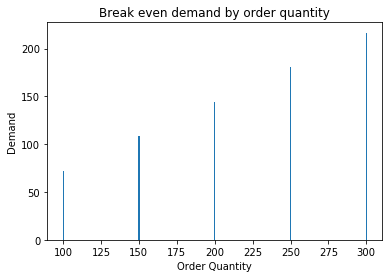

In [11]:
break_even_points = []
for oq in oq_scenarios:
    # Update the model with oq
    book_model.order_quantity = oq
    # Do the goal seek
    break_even = whatif.goal_seek(book_model, 'profit', 0.0, 'demand', 0, 2000)
    break_even_points.append(break_even)
    
print(np.around(break_even_points))

plt.bar(x=oq_scenarios, height=break_even_points)
plt.xlabel("Order Quantity")
plt.ylabel("Demand")
plt.title("Break even demand by order quantity")
plt.show();
    

Since we've made changes to the model object, we might want to reset its values to their initial values.

In [12]:
# See current attribute values
print(book_model)

# Hit the reset button
book_model.update(base_inputs)

# See current attribute values
print(book_model)

{'unit_cost': 7.5, 'selling_price': 10.0, 'unit_refund': 2.5, 'order_quantity': 300, 'demand': 193}
{'unit_cost': 7.5, 'selling_price': 10.0, 'unit_refund': 2.5, 'order_quantity': 200, 'demand': 193}


### Create a data table

Let's do a quick 1-way data table using the order quantities as our input variable.

In [13]:
scenario_inputs = {'order_quantity': oq_scenarios}
outputs = ['profit', 'total_revenue']

dt1_df = whatif.data_table(book_model, scenario_inputs, outputs)
dt1_df

,order_quantity,profit,total_revenue
0,100,250.0,1000.0
1,150,375.0,1500.0
2,200,437.0,1937.0
3,250,112.0,1987.0
4,300,-213.0,2037.0


### Run a simulation

Let's assume we model demand with a normal distribution with a mean of 193 and a standard deviation of 40. First we need to create a random number generator from `numpy.random`.

In [14]:
from numpy.random import default_rng
rg = default_rng(19)

In [15]:
demand_mean = 193
demand_sd = 40

n_reps = 1000

demand_sim = np.around(rg.normal(demand_mean, demand_sd, n_reps))

random_inputs = {'demand': demand_sim}

In [16]:
sim_results = whatif.simulate(book_model, random_inputs, outputs, scenario_inputs)
sim_results_df = whatif.get_sim_results_df(sim_results)
sim_results_df

,profit,total_revenue,scenario_num,order_quantity
0,250.0,1000.0,0,100
1,250.0,1000.0,0,100
2,250.0,1000.0,0,100
3,250.0,1000.0,0,100
4,250.0,1000.0,0,100
...,...,...,...,...
995,39.0,2289.0,4,300
996,741.0,2991.0,4,300
997,-186.0,2064.0,4,300
998,-312.0,1938.0,4,300


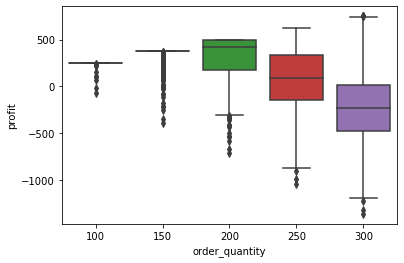

In [17]:
sns.boxplot(x="order_quantity", y="profit", data=sim_results_df);

Plenty of room for enhancements, but not bad. Pretty easy to use.